<img src="REcoM.png" alt="Drawing" style="width: 900px; margin: 0 auto">
<p style="text-align: center;">This notebook is an extensive demonstration of the *py_recom* module. *py_recom* is a tool for the evaluation of REcoM model outputs.</p>

### Table of Contents

* [0. Configuration](#CONFIG)
* [5 Extras](#EXTRAS)

# 0. Configuration<a class="anchor" id="CONFIG"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import socket
import sys
import os
home = os.path.expanduser("~")
sys.path.append(home+'/py_f2recom/GlobalAssessment/')
sys.path.append(home+ '/py_f2recom/modules/')
sys.path.append(home+ '/py_f2recom/modules/pyfesom2')
sys.path.append(home+ '/py_f2recom/modules/cmocean-master/')
sys.path.append(home+'/py_f2recom/modules/SkillMetrics/')
import pyfesom2 as pf
import skill_metrics as sm
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

Autosaving every 5 seconds
osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


In [1]:
#    Only modify parameters and paths in this cell       #
#  In principle, you don't have to modify anything else  #


# run specification -------------------------------------------------------------------------------------   
simu_name = 'A' # only usefull if you want to save figures

# defines paths ----------------------------------------------------------------------------------------- 

if socket.gethostname()[:5] == 'blogi':
    meshpath = '/scratch/usr/hbkoziel/mesh/farc'
    resultpath = '/scratch/projects/hbk00083/model_outputs/fesom2.1_recom'+simu_name+'/'
    savepath = home+'/pyfesom2/codes/py_f2recom_develop/outputs/'+simu_name+'/'
    evalpath      = '/scratch/usr/hbkoziel/evaluation/'
    evalpath2      = '/scratch/usr/hbkoziel/corrected_input/'
elif socket.gethostname()[:5] in ['albed','prod-']:
    #resultpath = '/albedo/work/projects/p_bio/model_output/A_riv'
    resultpath = '/albedo/work/projects/MarESys/GCB2022/A'
    savepath = home+'/py_f2recom/outputs/'+simu_name+'/'
    evalpath = '/albedo/work/projects/p_pool_recom/eval/'
    meshpath = '/albedo/work/projects/p_bio/mesh/core2/'
    #meshpath = '/albedo/work/user/yye/fesom2/meshes/core2_albedo/'
else:
    print('sorry, machine unknown, please customize your paths yourself')

# period of analysis ------------------------------------------------------------------------------------
first_year_maps = 2012
first_year = 2012
last_year  = 2021
    
years = np.arange(first_year,last_year+1,1)
years_last10 = np.arange(first_year_maps,last_year+1,1)

# specification of analysis ------------------------------------------------------------------------------------
layerwise = False
depths = (0,50,200,1000,2000) # If layerwise is True, you can define depths here, by defaut: (0,50,200,1000,2000,4000)
uplow = [0, 100]
mapproj = 'rob'
# Map projection ptions are : Mercator (merc), Plate Carree (pc),
# North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
# Robinson projection is quite time consuming.

NameError: name 'socket' is not defined

In [3]:
# export of analysis ------------------------------------------------------------------------------------
# Be aware that exporting figures may alter (crop) the display but the printed figures are okay
# This is because of bugs in the 'constrained_layout' matplotlib experimental function 
# that may be fixed in the future matplotlib version but out of our control
# If you prefer having a nice HTML, savefig must be turned off
#--------------------------------------------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")
savefig = True 
htmlname     =  simu_name+'_'+ today +'_extras.html'
htmlpath = savepath
verbose = True

if not os.path.exists(htmlpath): # create folders if do not exist
    os.makedirs(htmlpath)
if not os.path.exists(savepath):
    os.makedirs(savepath)

# visual check
if(verbose):
    print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
        resultpath, savepath, htmlpath, htmlname,years[0],years[-1]))
    print('\nLast ten years are \n{0}'.format(years_last10))
    
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)
mesh.path = meshpath

# export toolbox
!jupyter nbconvert --to=python Py_f2recom_toolbox.ipynb

Processing years 2012 to 2021

Reading out of /albedo/work/projects/MarESys/GCB2022/A
Storing graphs to /albedo/home/loziel/py_f2recom/outputs/A/
Storing html to /albedo/home/loziel/py_f2recom/outputs/A/ as A__2024_02_16.html

Last ten years are 
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
/albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2
[NbConvertApp] Converting notebook Py_f2recom_toolbox.ipynb to python
[NbConvertApp] Writing 48324 bytes to Py_f2recom_toolbox.py


# 5. Extras<a class="anchor" id="EXTRAS"></a>

## Rivers

netcdf RiverineInput {
dimensions:
	Dimnod2d = 126858 ;
	Dimmonths = 12 ;
variables:
	double Alkalinity(Dimmonths, Dimnod2d) ;
		Alkalinity:unit = "mmol/m2/s" ;
	double DIC(Dimmonths, Dimnod2d) ;
		DIC:unit = "mmol/m2/s" ;
	double DIN(Dimmonths, Dimnod2d) ;
		DIN:unit = "mmol/m2/s" ;
	double DOC(Dimmonths, Dimnod2d) ;
		DOC:unit = "mmol/m2/s" ;
	double DON(Dimmonths, Dimnod2d) ;
		DON:unit = "mmol/m2/s" ;
	double DSi(Dimmonths, Dimnod2d) ;
		DSi:unit = "mmol/m2/s" ;

// global attributes:
		:CDI = "Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)" ;
		:Conventions = "CF-1.6" ;
		:history = "Wed Jun 02 13:31:22 2021: cdo merge River.Alk.nc River.DIC.nc River.DIN.nc River.DOC.nc River.DON.nc River.DSi.nc RiverineInput.nc" ;
		:CDO = "Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)" ;
}


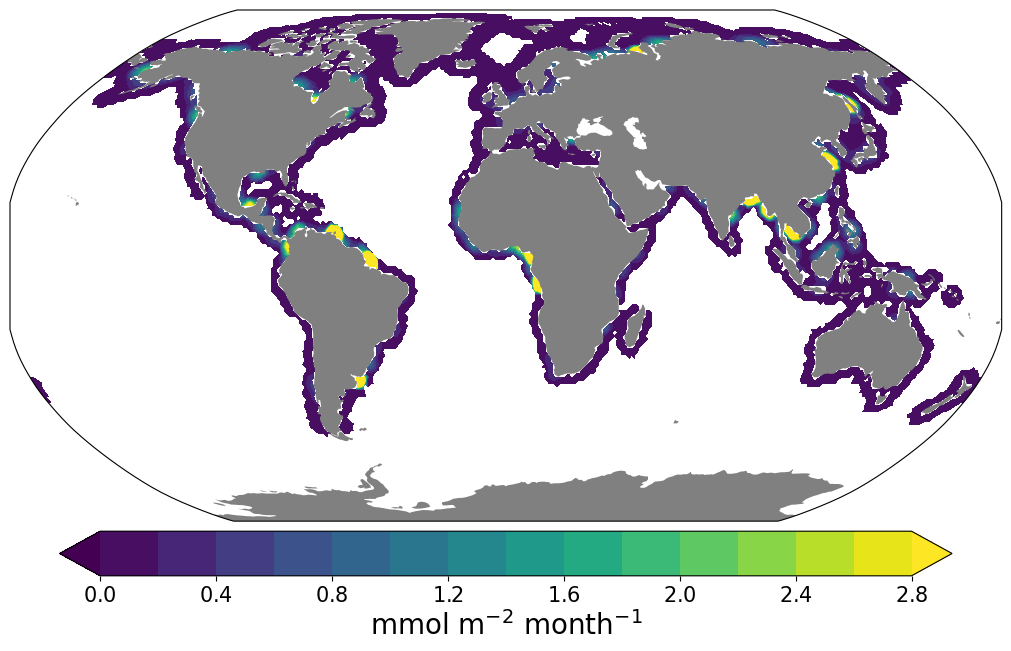

In [6]:
from netCDF4 import Dataset

NCfesom = '/albedo/work/projects/MarESys/ogurses/input/mesh_CORE2_finaltopo_mean/RiverineInput.nc'
!ncdump -h $NCfesom

f	= Dataset(NCfesom,'r')
DIN = f.variables['DIN'][:]

fig = pf.plot(mesh, 30*24*3600*DIN[9,:], mapproj = mapproj, units='mmol m$^{-2}$ month$^{-1}$', 
              levels = np.arange(0,3,.2),
              cmap='viridis')

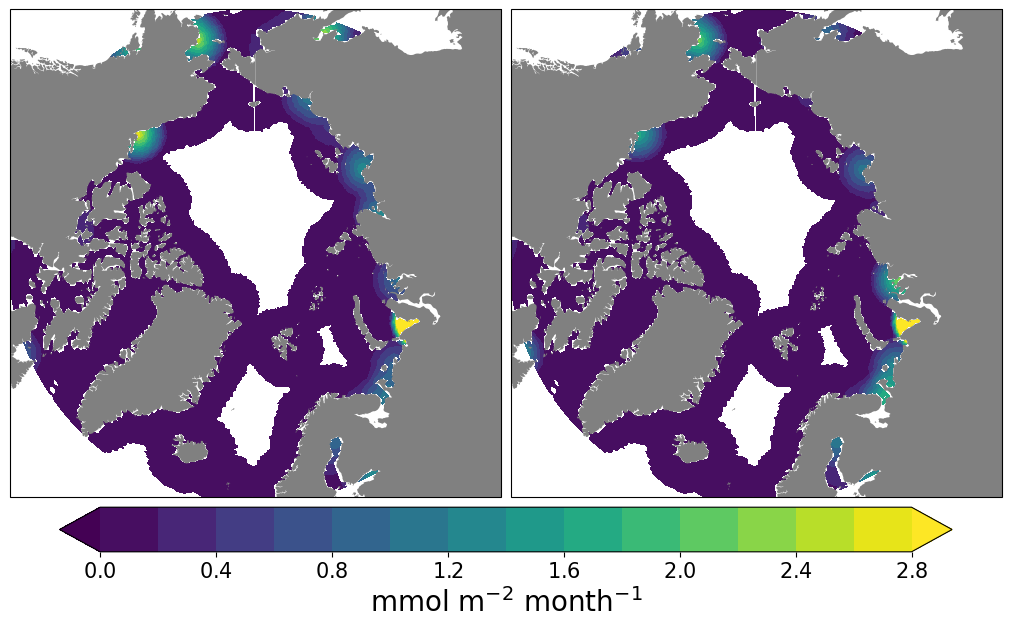

In [7]:
data1 = 30*24*3600*DIN[7,:]
data2 = 30*24*3600*DIN[9,:]

fig = pf.plot(mesh, [data1,data2], mapproj = 'np', units='mmol m$^{-2}$ month$^{-1}$', 
              levels = np.arange(0,3,.2), box=[-180, 180, 60, 90],
              cmap='viridis',
              rowscol=[1,2])

## Erosion

netcdf ErosionInput {
dimensions:
	Dimnod2d = 126858 ;
	Dimmonths = 12 ;
variables:
	double POC(Dimmonths, Dimnod2d) ;
		POC:unit = "mmol/m2/s" ;
	double PON(Dimmonths, Dimnod2d) ;
		PON:unit = "mmol/m2/s" ;

// global attributes:
		:CDI = "Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)" ;
		:Conventions = "CF-1.6" ;
		:history = "Thu Feb 04 14:12:16 2021: cdo merge Erosion.POC.nc Erosion.PON.nc ErosionInput.nc" ;
		:CDO = "Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)" ;
}


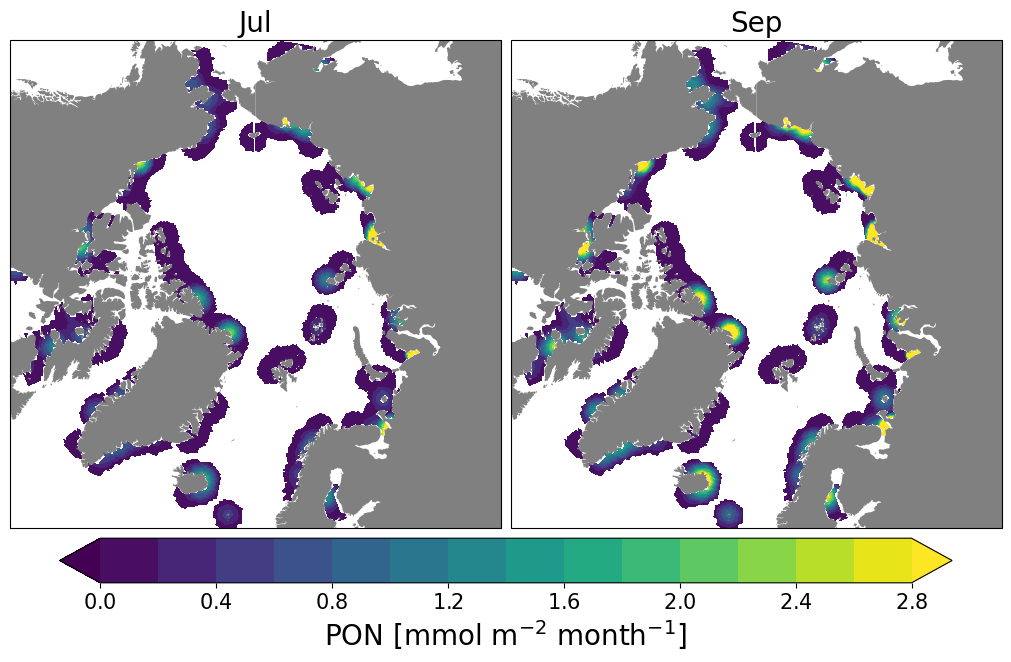

In [8]:
from netCDF4 import Dataset
NCfesom = '/albedo/work/projects/MarESys/ogurses/input/mesh_CORE2_finaltopo_mean/ErosionInput.nc'
!ncdump -h $NCfesom
f	= Dataset(NCfesom,'r')
PON = f.variables['PON'][:]

data1 = 30*24*3600*PON[6,:]
data2 = 30*24*3600*PON[8,:]

fig = pf.plot(mesh, [data1,data2], mapproj = 'np', units='PON [mmol m$^{-2}$ month$^{-1}$]', 
              levels = np.arange(0,3,.2), box=[-180, 180, 60, 90],
              cmap='viridis',
              rowscol=[1,2],
            titles=['Jul','Sep'])

# Benthic Denitrification

(12, 126858)
mean =  1.00000025e-05 [mmol/m2/s]
total =  0.057299032164646845  [TgN/yr]


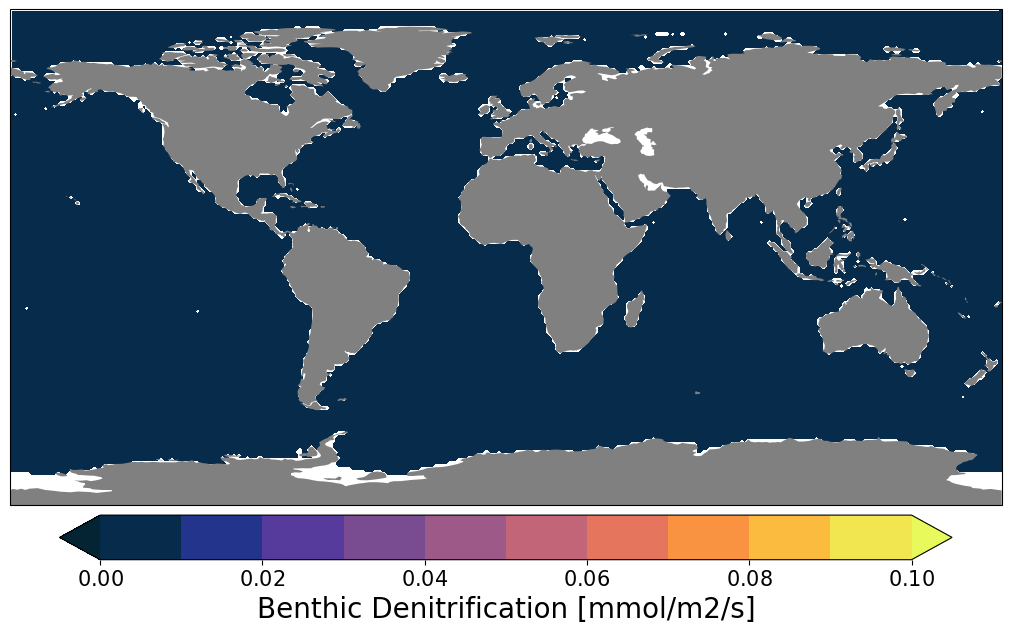

In [9]:
NCfesom = resultpath+'/denb.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

units = 'Benthic Denitrification [mmol/m2/s]'

f	= Dataset(NCfesom,'r')
data = f.variables['denb'][:]

print(np.shape(data))

data = np.nanmean(data,axis=0) # [mmol/m2/s]
data[data == 0] = 0.00001

print('mean = ',np.mean(data), '[mmol/m2/s]')

fig = pf.plot(mesh, [data], mapproj = 'pc', units=units, 
              levels = np.arange(0,.11,.01), box=[-180, 180, -90, 90],
              cmap='thermal',cmap_extension='both',
              rowscol=[1,1])

meshdiag=meshpath+'/'+runid+'.mesh.diag.nc'
diag = pf.get_meshdiag(mesh,meshdiag=meshdiag, runid=runid)
    
nod_area = diag.nod_area/10**6

denb_int = data * nod_area
print('total = ',np.nansum((14*86400*365*denb_int)/10**15),' [TgN/yr]') # [TgN/yr]

# Additional viz - work-in-progress

(12, 126858, 47)


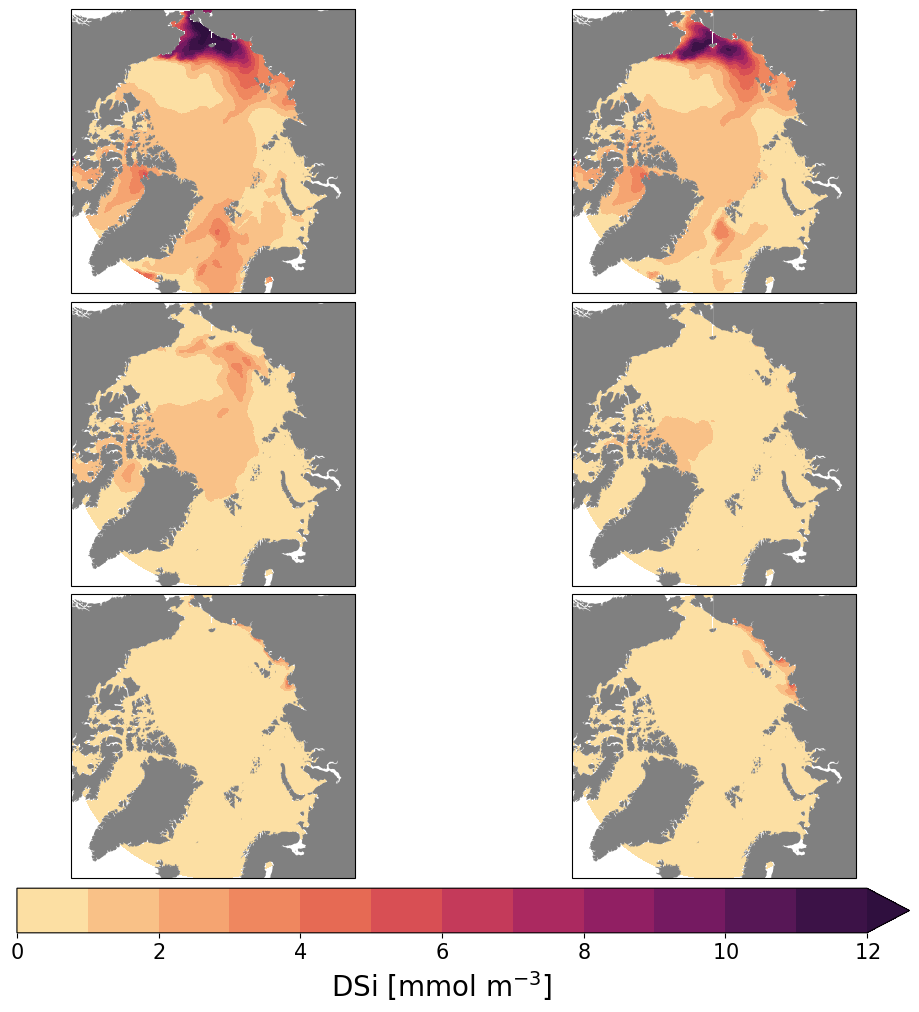

In [10]:
NCfesom = resultpath+'/DSi.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DSi [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DSi = f.variables['DSi'][:]
print(np.shape(DSi))

data1 = DSi[3,:,0]
data2 = DSi[4,:,0]
data3 = DSi[5,:,0]
data4 = DSi[6,:,0]
data5 = DSi[7,:,0]
data6 = DSi[8,:,0]

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,13,1), box=[-180, 180, 65, 90],
              cmap='matter',cmap_extension='max',
              rowscol=[3,2])

(12, 126858, 47)


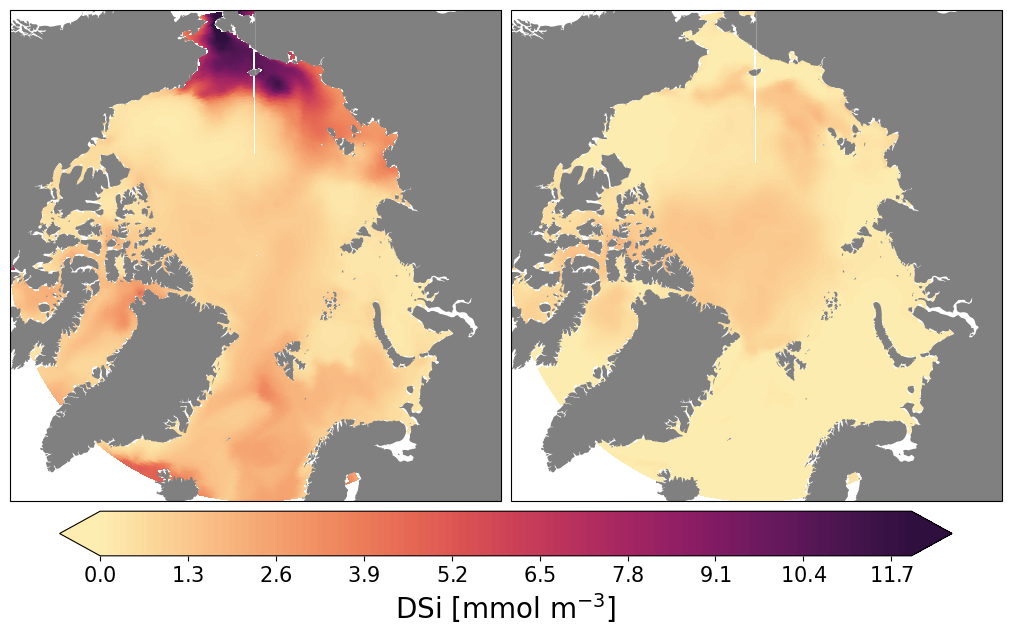

In [11]:
NCfesom = resultpath+'/DSi.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DSi [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DIN = f.variables['DSi'][:]
print(np.shape(DIN))

data_min = np.nanmean(DIN[0:2,:,0],axis=0)
data_max = np.nanmean(DIN[5:7,:,0],axis=0)

fig = pf.plot(mesh, [data_min,data_max], mapproj = 'np', units=units, 
              levels = np.arange(0,12.1,.1), box=[-180, 180, 65, 90],
              cmap='matter',
              rowscol=[1,2], cmap_extension='both')

(12, 126858, 47)


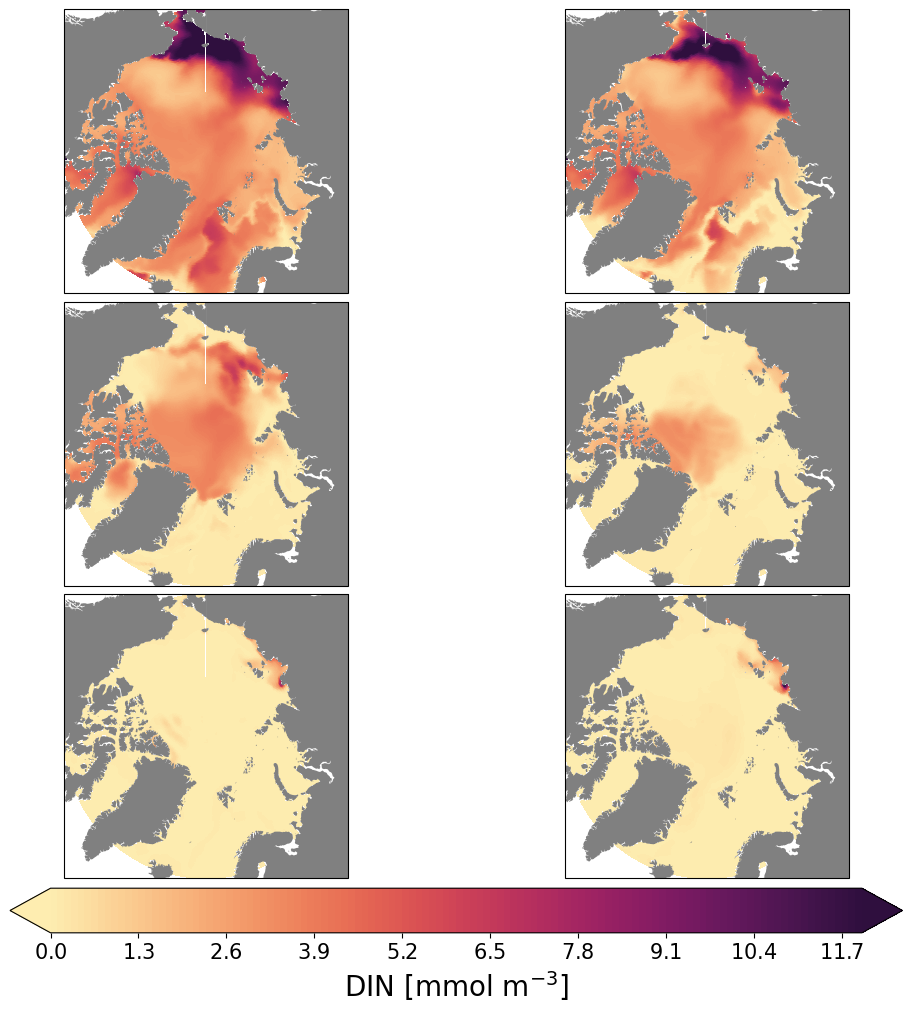

In [12]:
NCfesom = resultpath+'/DIN.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DIN [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DIN = f.variables['DIN'][:]
print(np.shape(DIN))

data1 = DIN[3,:,0]
data2 = DIN[4,:,0]
data3 = DIN[5,:,0]
data4 = DIN[6,:,0]
data5 = DIN[7,:,0]
data6 = DIN[8,:,0]

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,12.1,.1), box=[-180, 180, 65, 90],
              cmap='matter',
              rowscol=[3,2], cmap_extension='both')

(12, 126858, 47)


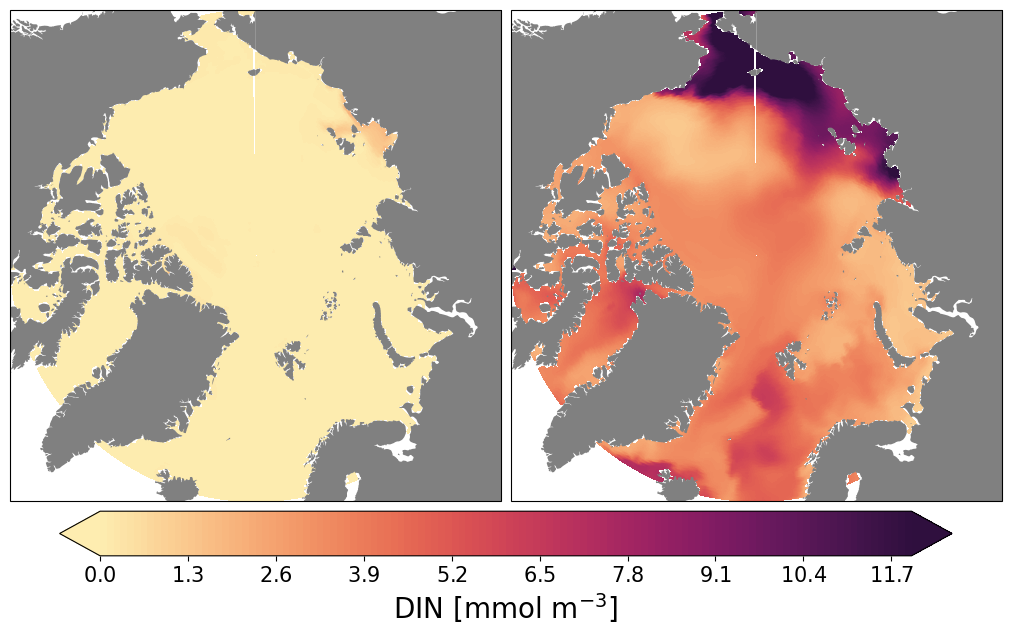

In [13]:
NCfesom = resultpath+'/DIN.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DIN [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DIN = f.variables['DIN'][:]
print(np.shape(DIN))

data_min = np.nanmin(DIN[:,:,0],axis=0)
data_max = np.nanmax(DIN[:,:,0],axis=0)

fig = pf.plot(mesh, [data_min,data_max], mapproj = 'np', units=units, 
              levels = np.arange(0,12.1,.1), box=[-180, 180, 65, 90],
              cmap='matter',
              rowscol=[1,2], cmap_extension='both')

(12, 126858, 47)


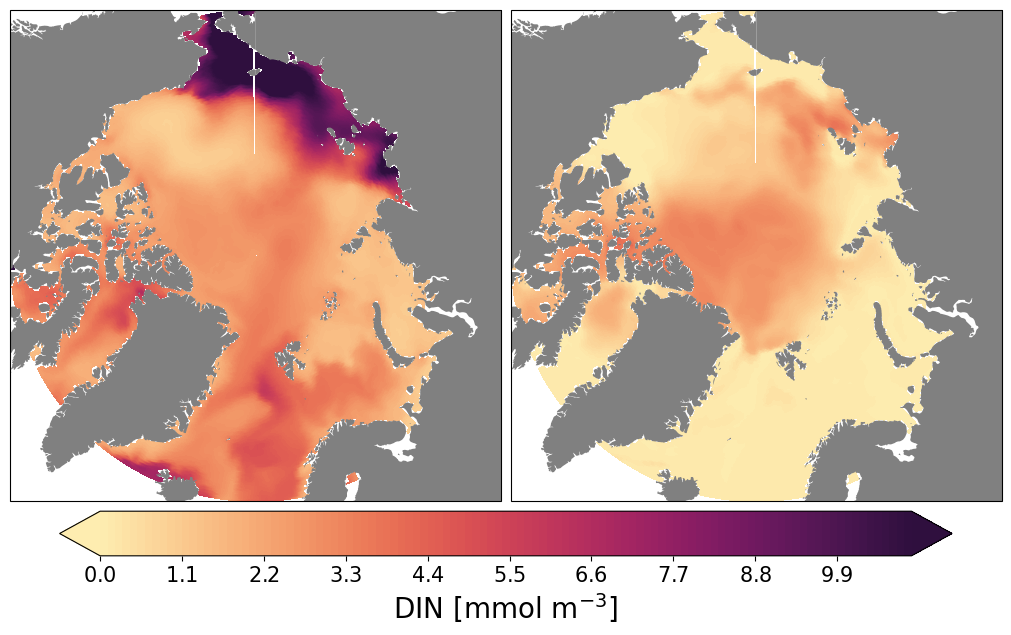

In [14]:
NCfesom = resultpath+'/DIN.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'DIN [mmol m$^{-3}$]'

f	= Dataset(NCfesom,'r')
DIN = f.variables['DIN'][:]
print(np.shape(DIN))

data_min = np.nanmean(DIN[0:2,:,0],axis=0)
data_max = np.nanmean(DIN[5:7,:,0],axis=0)

fig = pf.plot(mesh, [data_min,data_max], mapproj = 'np', units=units, 
              levels = np.arange(0,11,.1), box=[-180, 180, 65, 90],
              cmap='matter',
              rowscol=[1,2], cmap_extension='both')

(126858,)


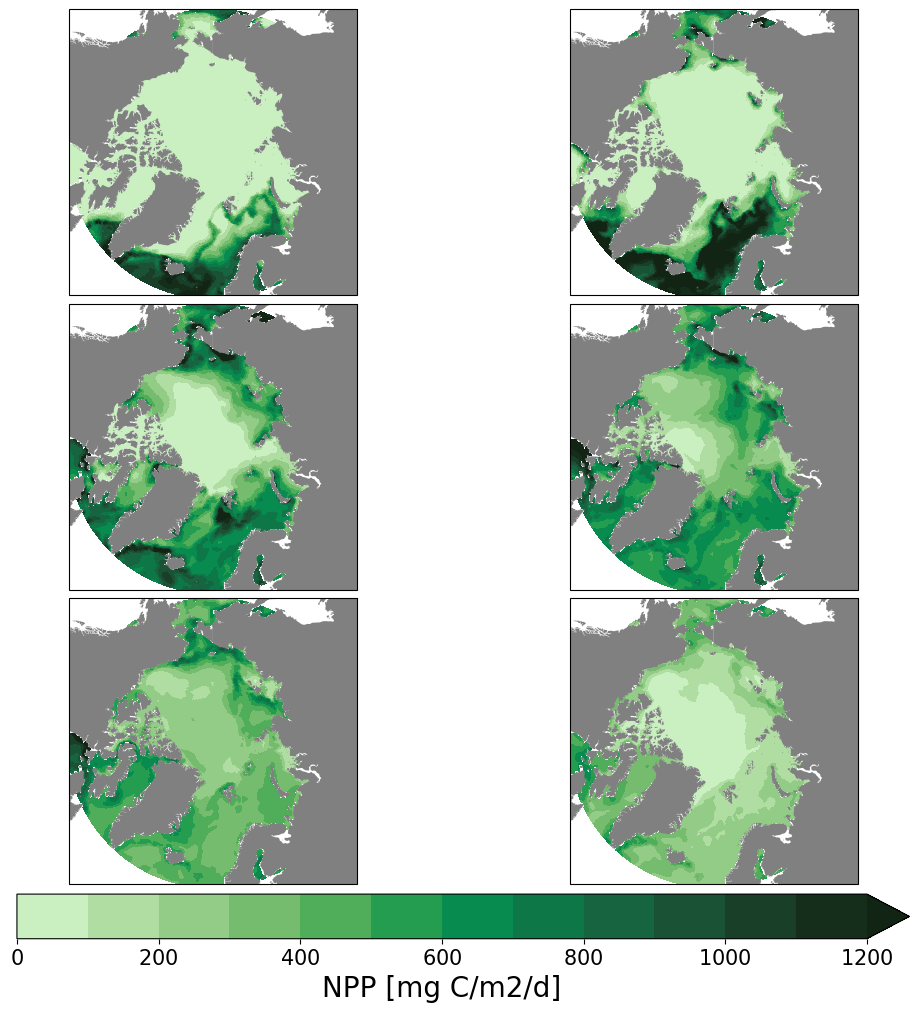

In [15]:
NCfesom1 = resultpath+'/NPPd.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/NPPn.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'NPP [mg C/m2/d]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['NPPd'][:]

f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['NPPn'][:]

data1 = NPPn[3,:] * 12.01 + NPPd[3,:] * 12.01
data2 = NPPn[4,:] * 12.01 + NPPd[4,:] * 12.01
data3 = NPPn[5,:] * 12.01 + NPPd[5,:] * 12.01
data4 = NPPn[6,:] * 12.01 + NPPd[6,:] * 12.01
data5 = NPPn[7,:] * 12.01 + NPPd[7,:] * 12.01
data6 = NPPn[8,:] * 12.01 + NPPd[8,:] * 12.01

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,1300,100), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max',
              rowscol=[3,2])

(126858,)


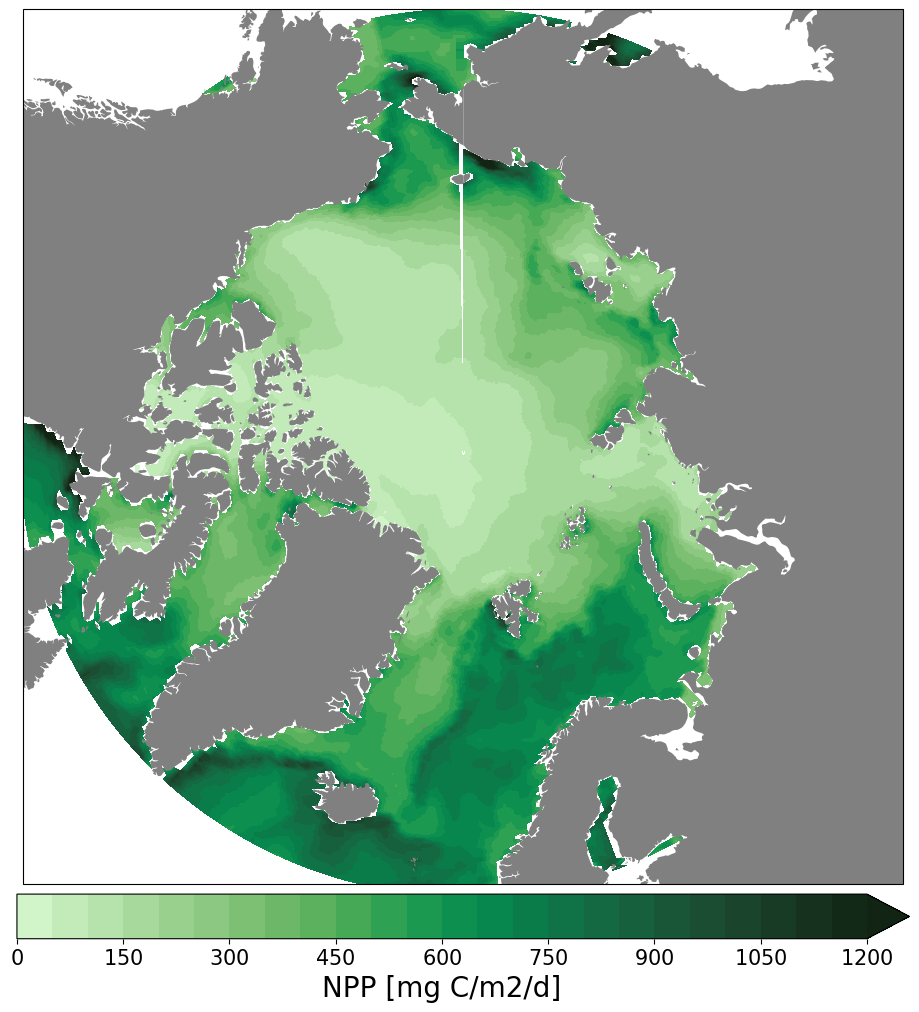

In [16]:
NCfesom1 = resultpath+'/NPPd.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/NPPn.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'NPP [mg C/m2/d]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['NPPd'][:]

f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['NPPn'][:]

data1 = np.nanmean(NPPn[4:8,:] * 12.01 + NPPd[4:8,:] * 12.01, axis=0)

print(np.shape(data1))

fig = pf.plot(mesh, [data1], mapproj = 'np', units=units, 
              levels = np.arange(0,1250,50), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max')

(12, 126858, 47)
(126858,)


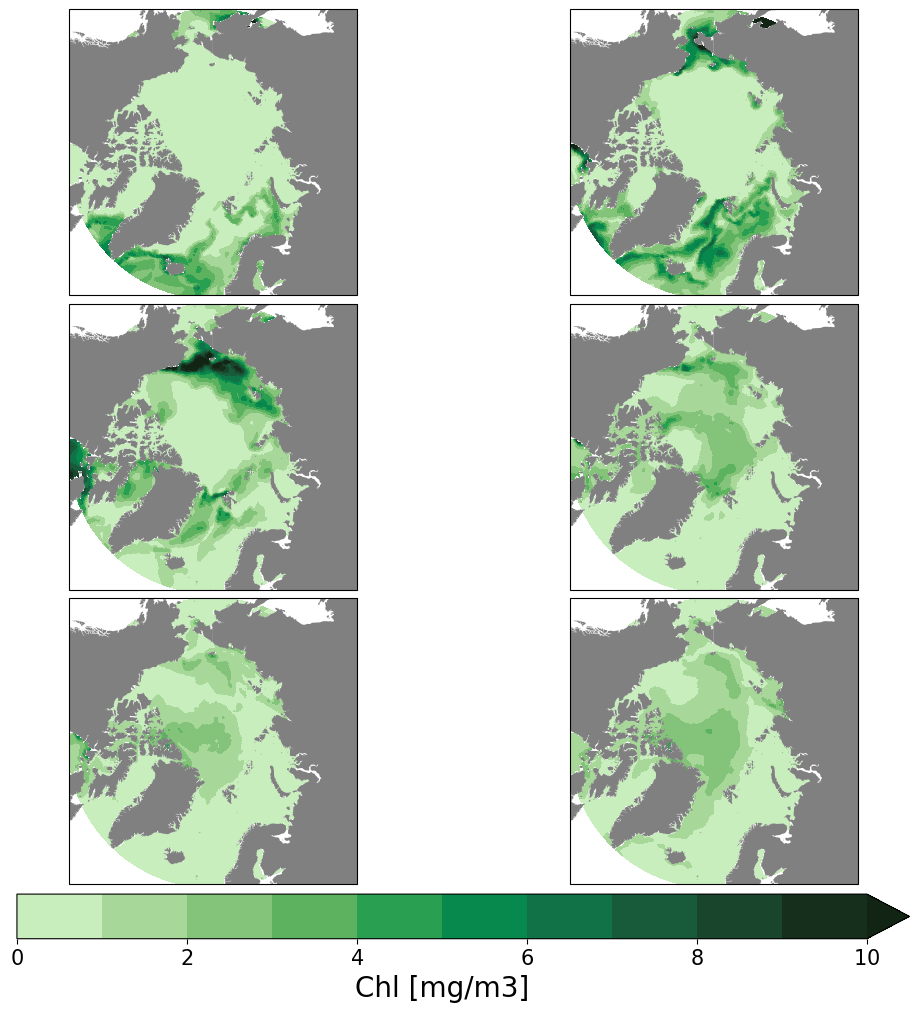

In [17]:
NCfesom1 = resultpath+'/DiaChl.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/PhyChl.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Chl [mg/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['DiaChl'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['PhyChl'][:]
print(np.shape(NPPd))

data1 = NPPd[3,:,0] + NPPn[3,:,0] 
data2 = NPPd[4,:,0] + NPPn[4,:,0] 
data3 = NPPd[5,:,0] + NPPn[5,:,0] 
data4 = NPPd[6,:,0] + NPPn[6,:,0] 
data5 = NPPd[7,:,0] + NPPn[7,:,0] 
data6 = NPPd[8,:,0] + NPPn[8,:,0]

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,11,1), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max',
              rowscol=[3,2])

(12, 126858, 47)
(126858,)


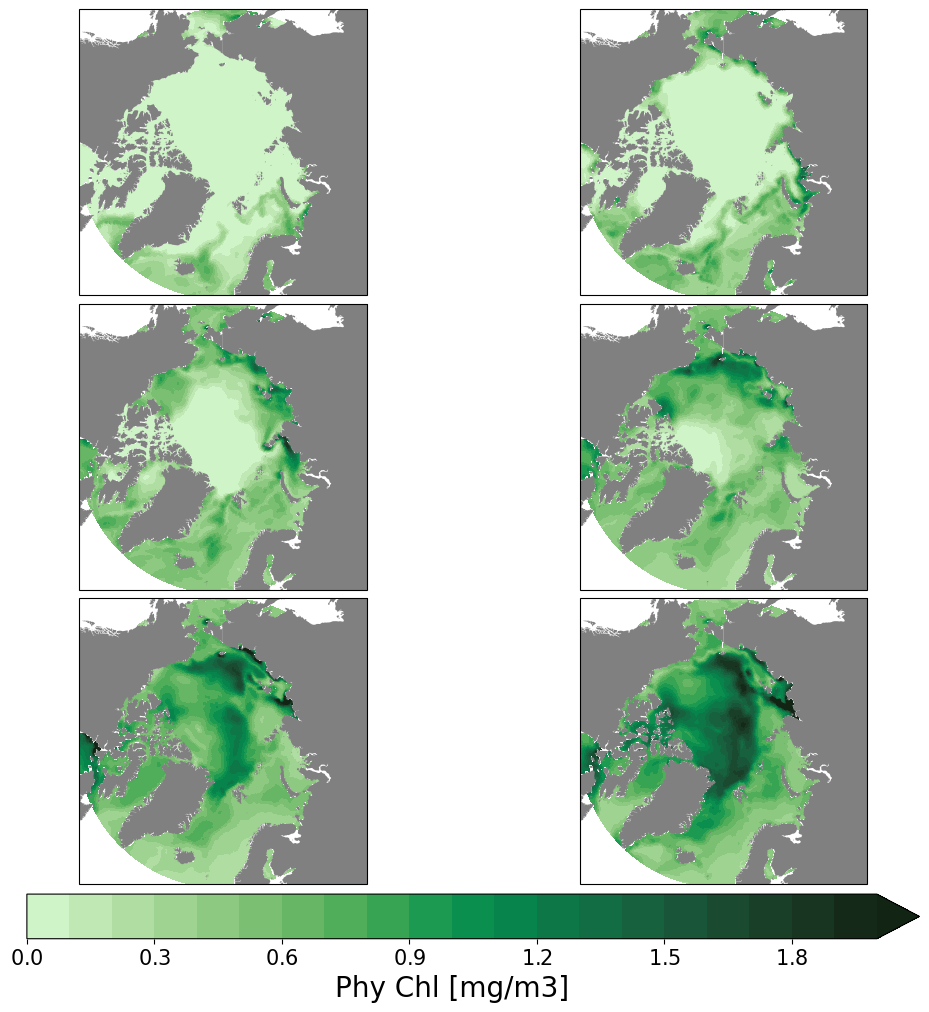

In [18]:
NCfesom1 = resultpath+'/DiaChl.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/PhyChl.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Phy Chl [mg/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['DiaChl'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['PhyChl'][:]
print(np.shape(NPPd))

data1 = NPPn[3,:,0] 
data2 = NPPn[4,:,0] 
data3 = NPPn[5,:,0] 
data4 = NPPn[6,:,0] 
data5 = NPPn[7,:,0] 
data6 = NPPn[8,:,0]

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,2.1,.1), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max',
              rowscol=[3,2])

(12, 126858, 47)
(126858,)


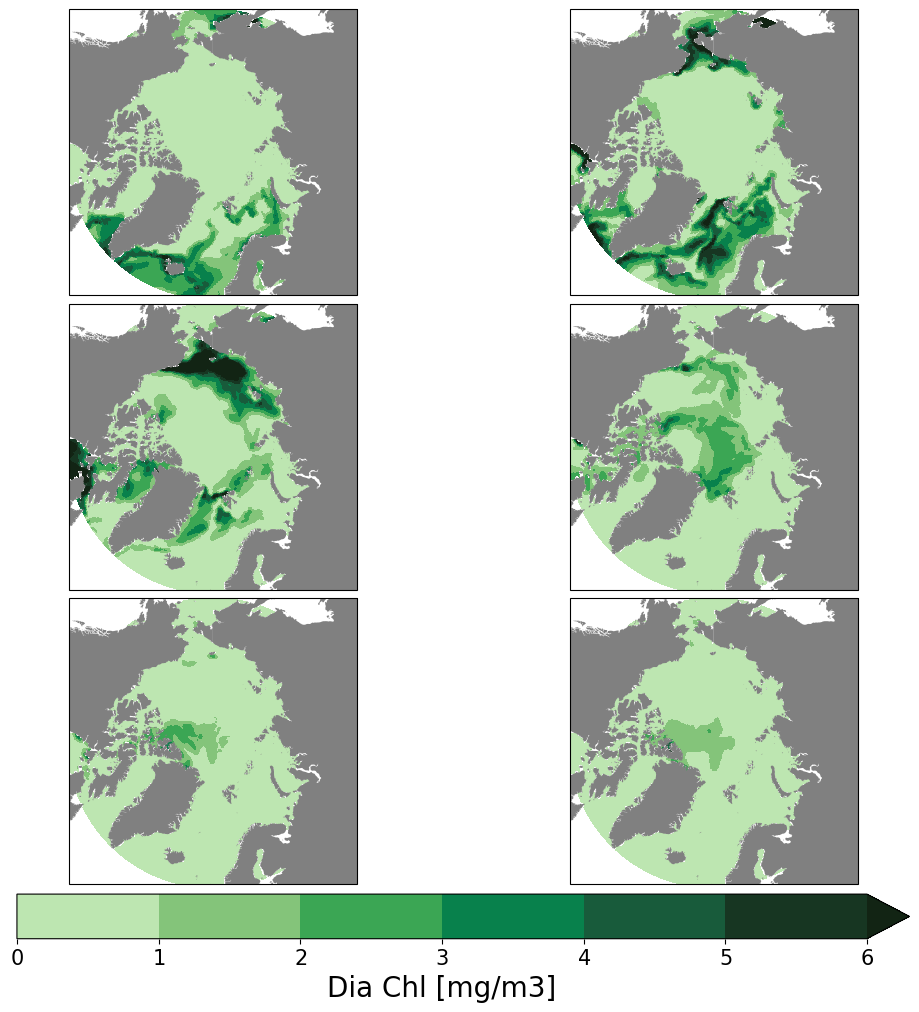

In [19]:
NCfesom1 = resultpath+'/DiaChl.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/PhyChl.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Dia Chl [mg/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['DiaChl'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['PhyChl'][:]
print(np.shape(NPPd))

data1 = NPPd[3,:,0] 
data2 = NPPd[4,:,0] 
data3 = NPPd[5,:,0] 
data4 = NPPd[6,:,0] 
data5 = NPPd[7,:,0] 
data6 = NPPd[8,:,0]

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,7,1), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max',
              rowscol=[3,2])

(12, 126858, 47)
(126858,)


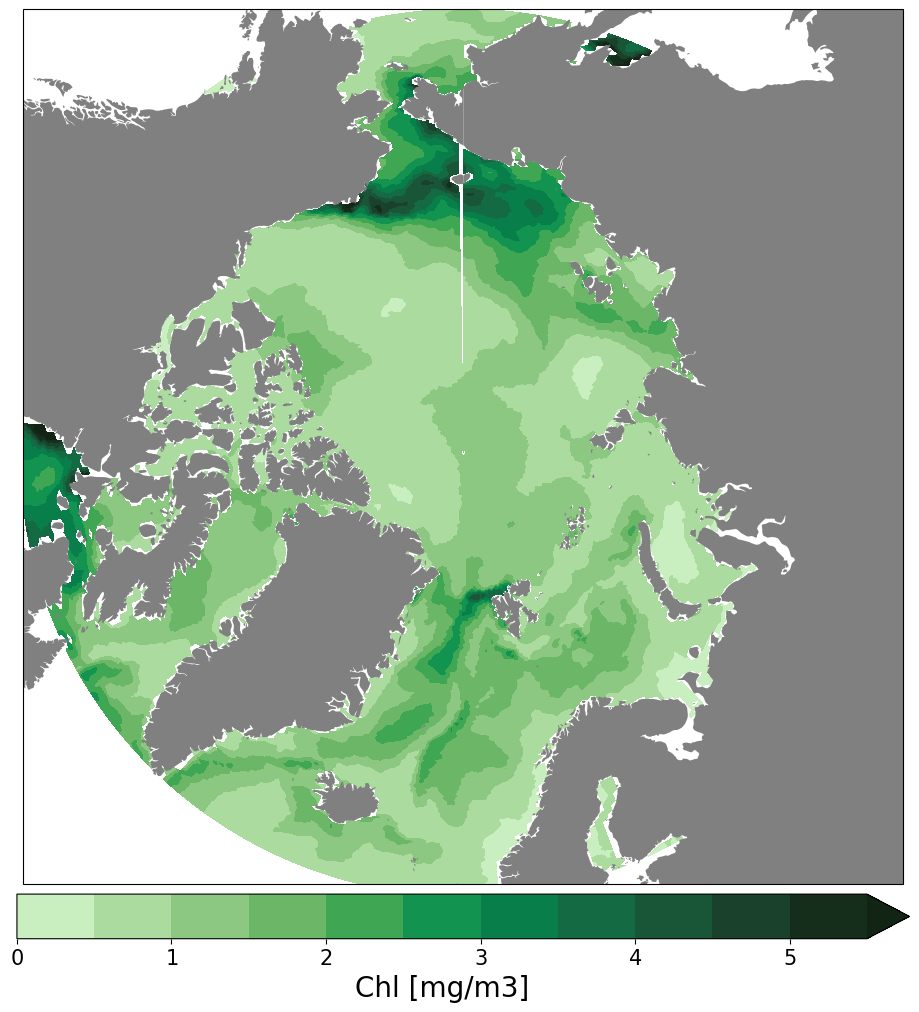

In [20]:
NCfesom1 = resultpath+'/DiaChl.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/PhyChl.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Chl [mg/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['DiaChl'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['PhyChl'][:]
print(np.shape(NPPd))

data1 = np.nanmean(NPPd[4:8,:,0] + NPPn[4:8,:,0], axis=0)

print(np.shape(data1))

fig = pf.plot(mesh, [data1], mapproj = 'np', units=units, 
              levels = np.arange(0,6,.5), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max')

(12, 126858, 47)
(8376,)
(12, 8376, 5)


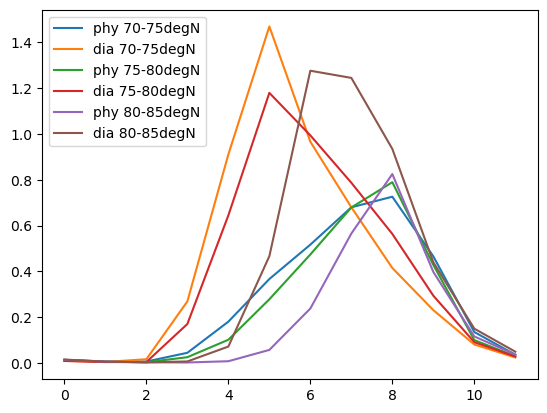

In [21]:
NCfesom1 = resultpath+'/DiaChl.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/PhyChl.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Chl [mg/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['DiaChl'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['PhyChl'][:]
print(np.shape(NPPd))

ind0 = np.squeeze(np.where((mesh.y2>=70) & (mesh.y2<75)))
ind1 = np.squeeze(np.where((mesh.y2>=75) & (mesh.y2<80)))
ind2 = np.squeeze(np.where((mesh.y2>=80) & (mesh.y2<85)))

print(np.shape(ind0))
print(np.shape(NPPn[:,ind0,0:5]))

phy0 = np.nanmean(np.nanmean(NPPn[:,ind0,0:5], axis=2),axis=1)
dia0 = np.nanmean(np.nanmean(NPPd[:,ind0,0:5], axis=2),axis=1)

phy1 = np.nanmean(np.nanmean(NPPn[:,ind1,0:5], axis=2),axis=1)
dia1 = np.nanmean(np.nanmean(NPPd[:,ind1,0:5], axis=2),axis=1)

phy2 = np.nanmean(np.nanmean(NPPn[:,ind2,0:5], axis=2),axis=1)
dia2 = np.nanmean(np.nanmean(NPPd[:,ind2,0:5], axis=2),axis=1)

plt.plot(phy0,label = 'phy 70-75degN')
plt.plot(dia0,label = 'dia 70-75degN')
plt.plot(phy1,label = 'phy 75-80degN')
plt.plot(dia1,label = 'dia 75-80degN')
plt.plot(phy2,label = 'phy 80-85degN')
plt.plot(dia2,label = 'dia 80-85degN')
plt.legend()

(12, 126858)


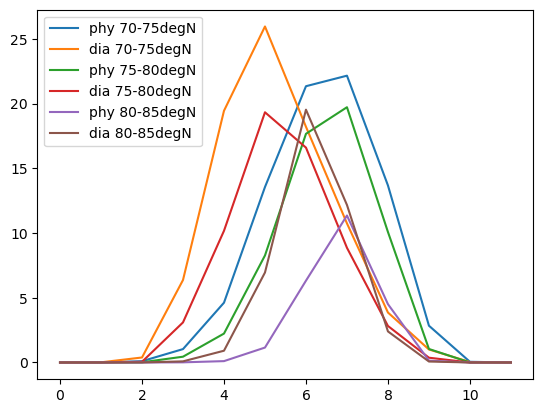

In [22]:
NCfesom1 = resultpath+'/NPPd.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/NPPn.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Chl [mg/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['NPPd'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['NPPn'][:]
print(np.shape(NPPd))

ind0 = np.squeeze(np.where((mesh.y2>=70) & (mesh.y2<75)))
ind1 = np.squeeze(np.where((mesh.y2>=75) & (mesh.y2<80)))
ind2 = np.squeeze(np.where((mesh.y2>=80) & (mesh.y2<85)))

phy0 = np.nanmean(NPPn[:,ind0], axis=1)
dia0 = np.nanmean(NPPd[:,ind0], axis=1)

phy1 = np.nanmean(NPPn[:,ind1], axis=1)
dia1 = np.nanmean(NPPd[:,ind1], axis=1)

phy2 = np.nanmean(NPPn[:,ind2], axis=1)
dia2 = np.nanmean(NPPd[:,ind2], axis=1)


plt.plot(phy0,label = 'phy 70-75degN')
plt.plot(dia0,label = 'dia 70-75degN')
plt.plot(phy1,label = 'phy 75-80degN')
plt.plot(dia1,label = 'dia 75-80degN')
plt.plot(phy2,label = 'phy 80-85degN')
plt.plot(dia2,label = 'dia 80-85degN')
plt.legend()

(12, 126858, 47)
(126858,)


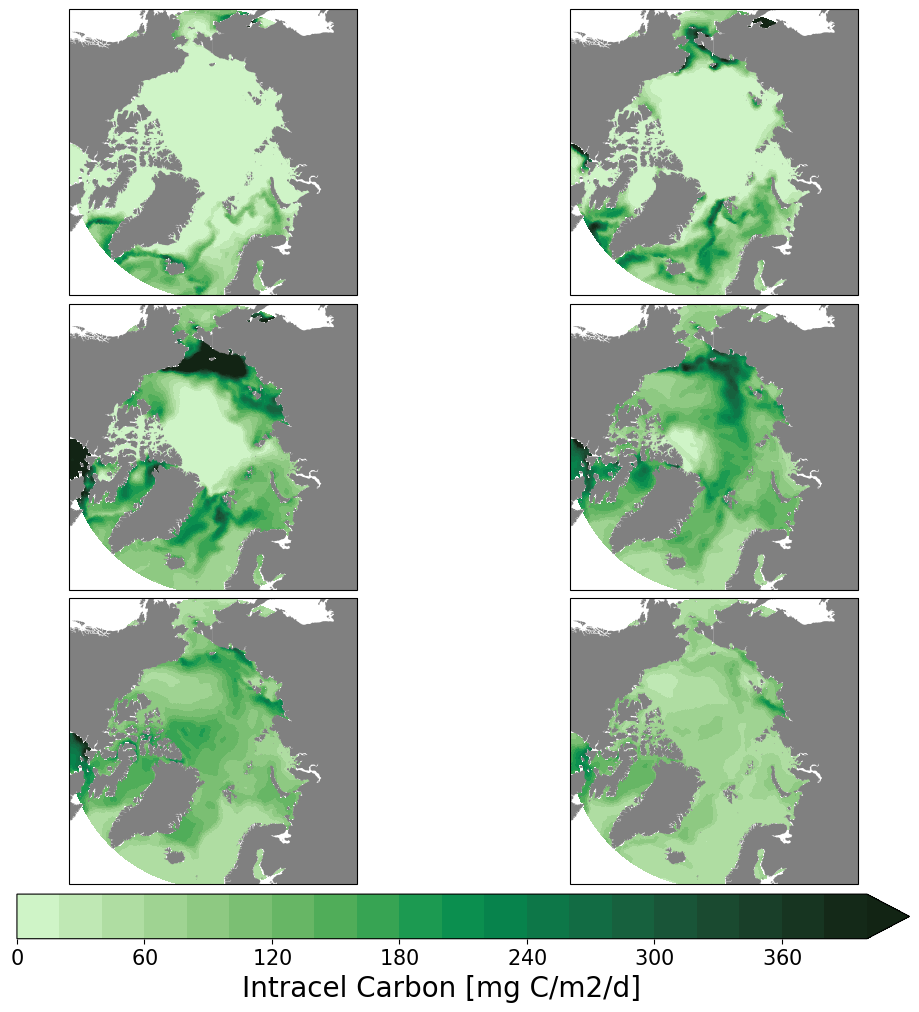

In [23]:
NCfesom1 = resultpath+'/DiaC.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/PhyC.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Intracel Carbon [mg C/m2/d]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['DiaC'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['PhyC'][:]
print(np.shape(NPPd))

data1 = 12.01* (NPPd[3,:,0] + NPPn[0,:,0] ) 
data2 = 12.01* (NPPd[4,:,0] + NPPn[2,:,0] )
data3 = 12.01* (NPPd[5,:,0] + NPPn[5,:,0] )
data4 = 12.01* (NPPd[6,:,0] + NPPn[6,:,0] )
data5 = 12.01* (NPPd[7,:,0] + NPPn[7,:,0] )
data6 = 12.01* (NPPd[8,:,0] + NPPn[8,:,0] )

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,420,20), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max',
              rowscol=[3,2])

(12, 126858, 47)
(126858,)


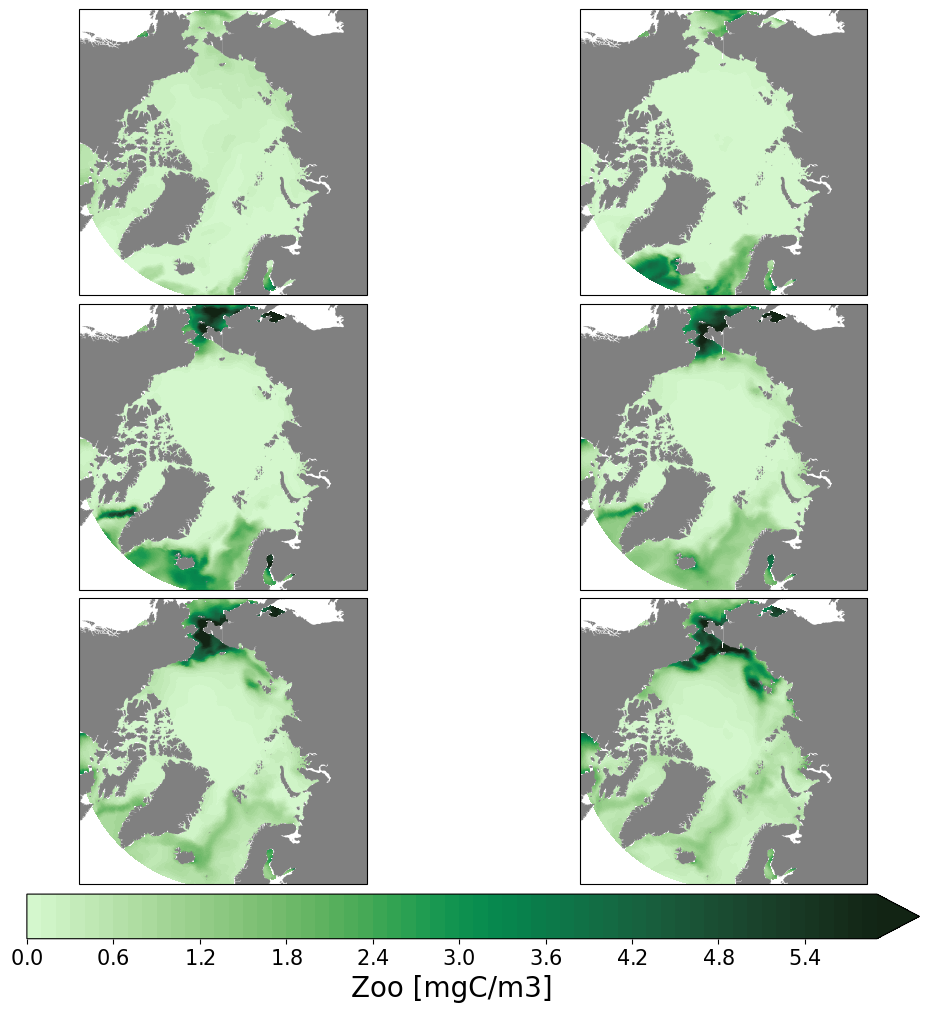

In [24]:
NCfesom1 = resultpath+'/HetC.fesom.'+str(last_year)+'.nc'
NCfesom2 = resultpath+'/Zoo2C.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Zoo [mgC/m3]'

f1	= Dataset(NCfesom1,'r')
NPPd = f1.variables['HetC'][:]
f2	= Dataset(NCfesom2,'r')
NPPn = f2.variables['Zoo2C'][:]
print(np.shape(NPPd))

data1 = NPPd[3,:,0] + NPPn[0,:,0] 
data2 = NPPd[4,:,0] + NPPn[2,:,0] 
data3 = NPPd[5,:,0] + NPPn[5,:,0] 
data4 = NPPd[6,:,0] + NPPn[6,:,0] 
data5 = NPPd[7,:,0] + NPPn[7,:,0] 
data6 = NPPd[8,:,0] + NPPn[8,:,0] 

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,6,.1), box=[-180, 180, 60, 90],
              cmap='algae',cmap_extension='max',
              rowscol=[3,2])

(12, 126858, 47)
(126858,)


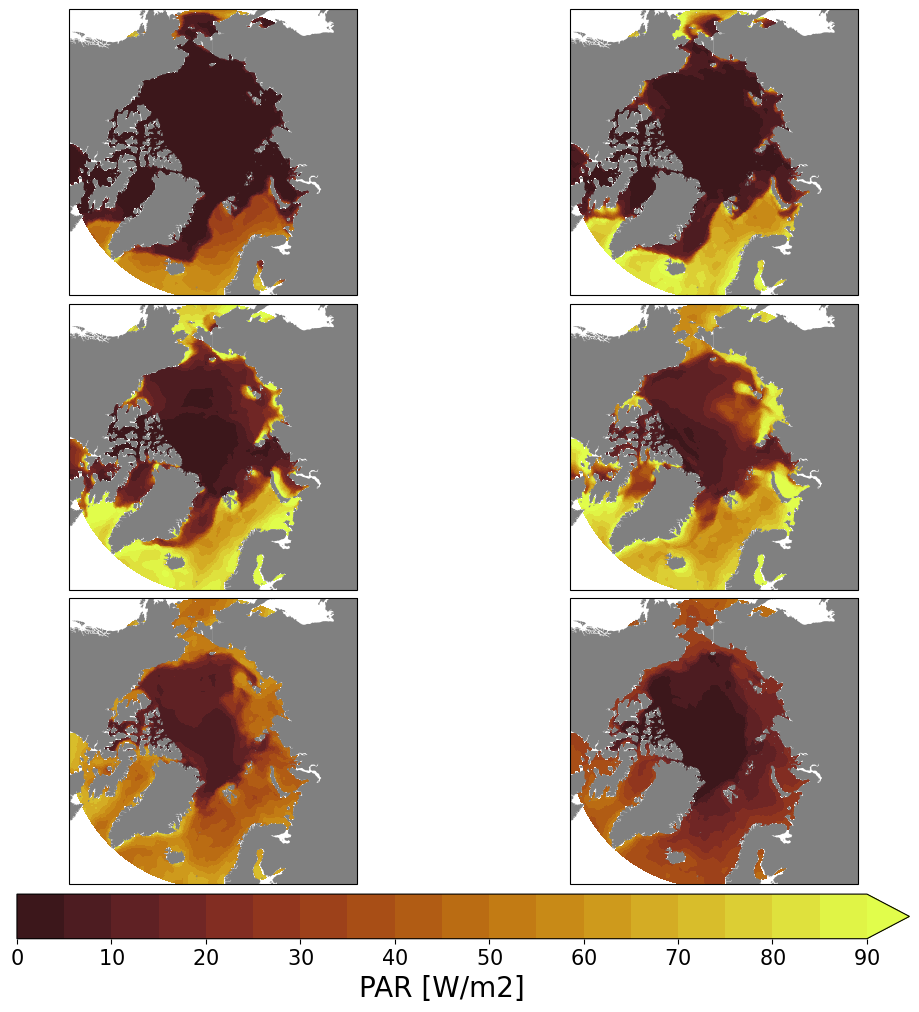

In [25]:
NCfesom = resultpath+'/PAR.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'PAR [W/m2]'

f	= Dataset(NCfesom,'r')
NPPd = f.variables['PAR'][:]
print(np.shape(NPPd))

data1 = NPPd[3,:,0] 
data2 = NPPd[4,:,0] 
data3 = NPPd[5,:,0] 
data4 = NPPd[6,:,0] 
data5 = NPPd[7,:,0] 
data6 = NPPd[8,:,0] 

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,95,5), box=[-180, 180, 60, 90],
              cmap='solar',cmap_extension='max',
              rowscol=[3,2])

(12, 126858)
(126858,)


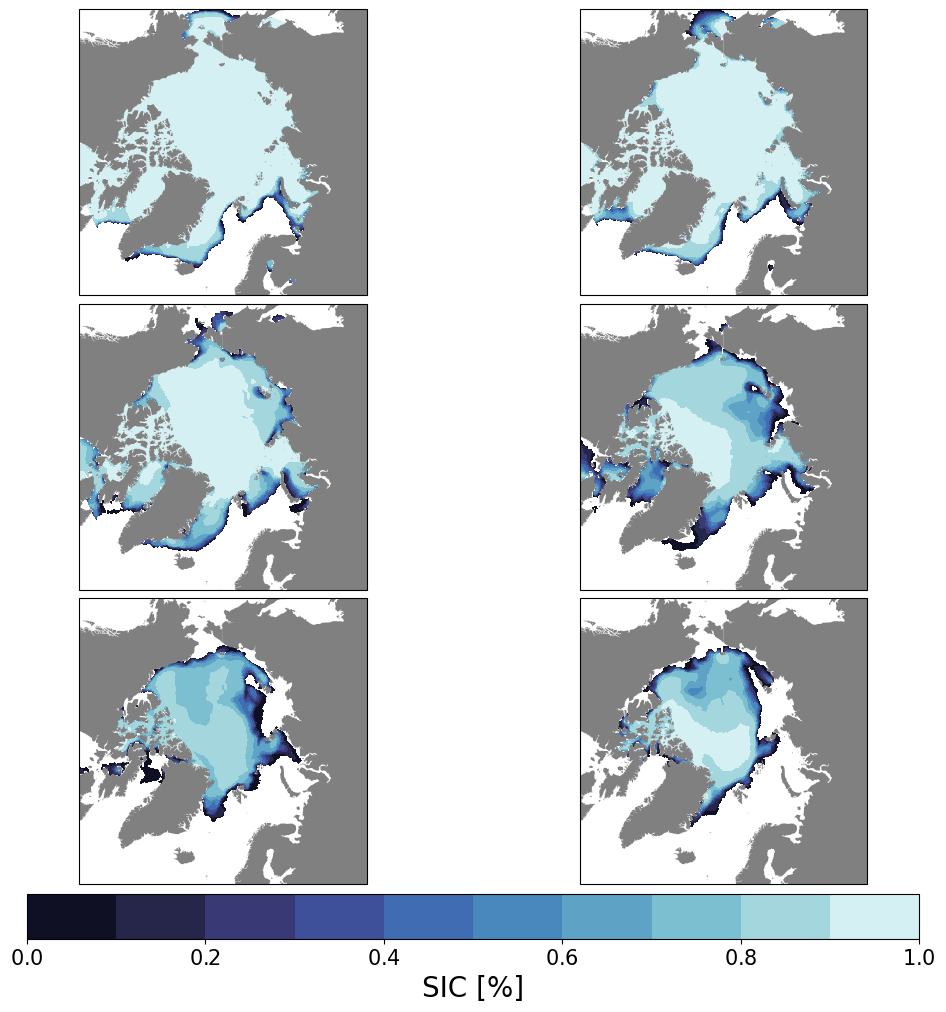

In [26]:
NCfesom = resultpath+'/a_ice.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'SIC [%]'

f	= Dataset(NCfesom,'r')
NPPd = f.variables['a_ice'][:]
print(np.shape(NPPd))

data1 = NPPd[3,:] 
data2 = NPPd[4,:] 
data3 = NPPd[5,:] 
data4 = NPPd[6,:] 
data5 = NPPd[7,:] 
data6 = NPPd[8,:] 

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,1.1,.1), box=[-180, 180, 60, 90],
              cmap='ice',cmap_extension='neither',
              rowscol=[3,2])

(12, 126858)
(126858,)


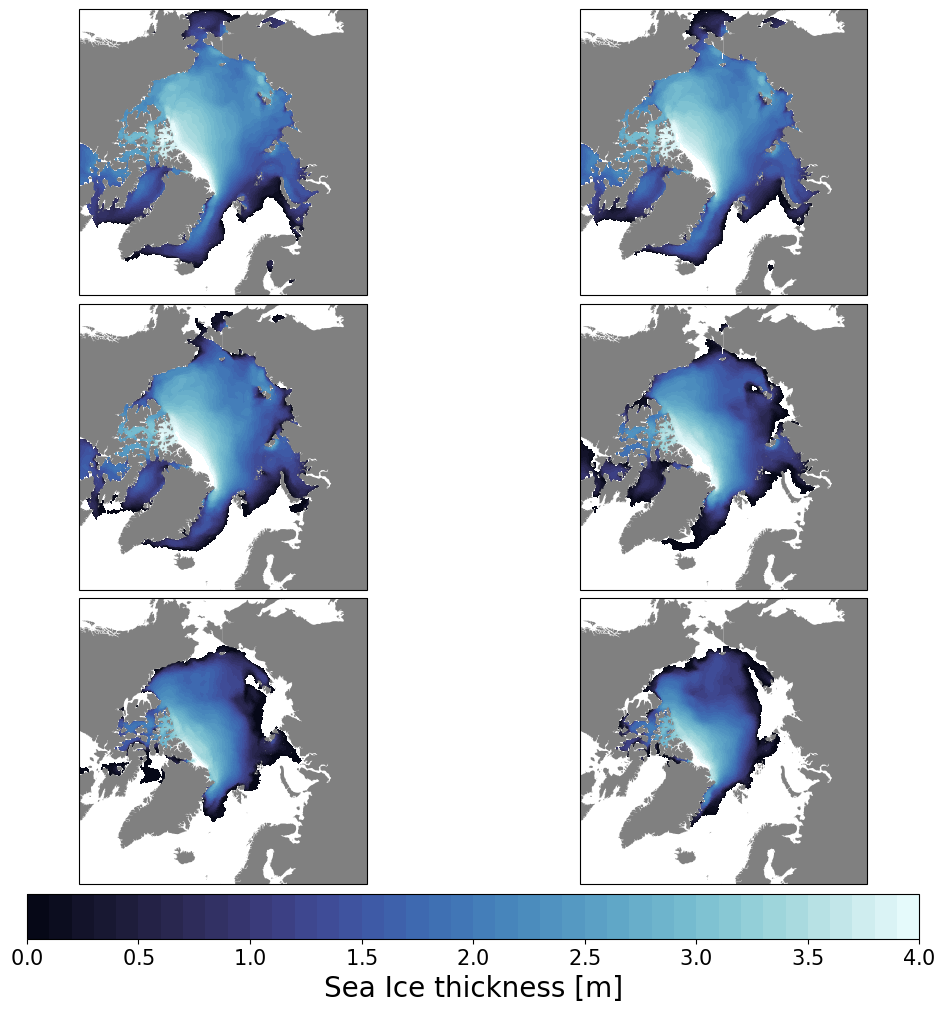

In [27]:
NCfesom = resultpath+'/m_ice.fesom.'+str(last_year)+'.nc'
#!ncdump -h $NCfesom

# 12.01* data --> mmolC/m2/d to mg C/m2/d

units = 'Sea Ice thickness [m]'

f	= Dataset(NCfesom,'r')
NPPd = f.variables['m_ice'][:]
print(np.shape(NPPd))

data1 = NPPd[3,:] 
data2 = NPPd[4,:] 
data3 = NPPd[5,:] 
data4 = NPPd[6,:] 
data5 = NPPd[7,:] 
data6 = NPPd[8,:] 

print(np.shape(data1))

fig = pf.plot(mesh, [data1,data2,data3,data4,data5,data6], mapproj = 'np', units=units, 
              levels = np.arange(0,4.1,.1), box=[-180, 180, 60, 90],
              cmap='ice',cmap_extension='neither',
              rowscol=[3,2])

# Save notebook as html

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')
%autosave 2
!jupyter nbconvert $nb_name --output-dir=$htmlpath --to html --no-input